<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Final Project -Programming for  Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  TOPIC: ANALYSIS ON GOOGLE PLAY STORE APP
</div>

<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0">
  Stage 2: Exploration Data Analysis
</div>

## TABLE OF CONTENT:
>[ 1. Import Library](#1.-Import-Library)  
>[ 2. Exploring your data](#2.-Exploring-your-data)  
>[ 3. Solving questions](#3.-Solving-questions)    
>>[ Question 01: Ho Dinh Duy Luc](#Question-01:-Ho-Dinh-Duy-Luc)  
>> [ Question 02: Vo Phu Han](#Question-02:-Vo-Phu-Han)  

## 1. Import Library

In [92]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Statistical analysis libraries
import scipy.stats as stats

# Natural language processing libraries
from sklearn.feature_extraction.text import CountVectorizer

# Miscellaneous libraries
import warnings
warnings.filterwarnings('ignore')


## 2. Exploring your data

### Read cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [93]:
# YOUR CODE HERE
df = pd.read_csv("../Data/Processed/cleaned_apps.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,4.4 and up



<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 10px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0">
  Columns descriptions:
</div>


| Column | Meaning |
| --- | --- |
| **App** | Name of the app |
| **Category** | Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc. |
| **Rating** | The current average rating (out of 5) of the app on Google Play |
| **Reviews** | Number of user reviews given on the app |
| **Size** | Size of the app in MB (megabytes) |
| **Installs** | Number of times the app was downloaded from Google Play |
| **Type** | Whether the app is paid or free |
| **Price** | Price of the app in US$ |
| **Content Rating** | Subject the app aim to |
| **Last Updated** | Date on which the app was last updated on Google Play |
| **Android Ver** | The configuration that devices need in order to work properly |

**Content:** Each app (row) has values for catergory, rating, size, and more.

### Numerical analysis using descriptive statistics

**Check for NaN in the dataset**

In [94]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Last Updated      0
Android Ver       2
dtype: int64

In [95]:
# YOUR CODE HERE
df = df.dropna()

**Check for duplicate in the dataset**

In [96]:
df.duplicated().sum()

0

**Check datatype**

In [97]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9656 entries, 0 to 9658
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9656 non-null   object 
 1   Category        9656 non-null   object 
 2   Rating          9656 non-null   float64
 3   Reviews         9656 non-null   int64  
 4   Size            9656 non-null   float64
 5   Installs        9656 non-null   int64  
 6   Type            9656 non-null   object 
 7   Price           9656 non-null   float64
 8   Content Rating  9656 non-null   object 
 9   Last Updated    9656 non-null   object 
 10  Android Ver     9656 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 905.2+ KB


In [98]:
print('Number of apps in the dataset : ' , len(df))
df.sample(7)

Number of apps in the dataset :  9656


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
6959,CW Nuclear,BOOKS_AND_REFERENCE,3.300000,15,12.0,1000,Free,0.0,Everyone,2017-11-17,4.0 and up
2602,Wifi Analyzer,TOOLS,4.400000,335115,1.8,10000000,Free,0.0,Everyone,2018-04-07,6.0 and up
6549,Burrito Bash – We Bare Bears,FAMILY,4.300000,10776,21.0,1000000,Free,0.0,Everyone,2017-10-26,4.1 and up
8536,Masha and the Bear. Games for kids,FAMILY,4.600000,6231,31.0,1000000,Free,0.0,Everyone,2018-07-13,4.0.3 and up
2727,Power Booster - Junk Cleaner & CPU Cooler & Boost,PRODUCTIVITY,4.500000,9653,5.1,1000000,Free,0.0,Everyone,2018-08-06,4.1 and up
1988,BP Journal - Blood Pressure Diary,MEDICAL,5.000000,6,26.0,1000,Free,0.0,Everyone,2018-05-25,4.4 and up
5607,BQ Partners,COMMUNICATION,4.121484,0,5.7,1000,Free,0.0,Everyone,2018-07-27,Varies with device


**Descriptive statistics show the characteristics of numerical features:**


In [99]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9656.000000,9.656000e+03,9656.000000,9.656000e+03,9656.000000
mean,4.172172,2.166598e+05,19.441717,7.779922e+06,1.099486
std,0.495653,1.831600e+06,20.764235,5.376646e+07,16.854762
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.075000,1.000000e+03,0.000000
50%,4.200000,9.670000e+02,11.000000,1.000000e+05,0.000000
75%,4.500000,2.942025e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


**OBSERVATION**: 
No improper value found in the above table.

### Describe the correlation between features in the dataset

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal.

Text(0.5, 1.0, 'Correlation matrix between numerical data of the Apps')

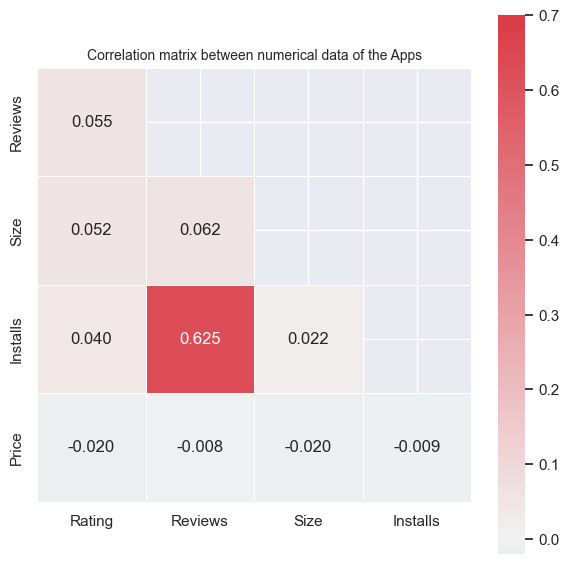

In [100]:
#Select value from corr matrix
df_chart = df.select_dtypes(include = ['int64','float64'])
corr = df_chart.corr()
mask = np.zeros_like(corr, dtype= 'bool')
mask[np.triu_indices_from(mask)] = True
adjust_corr = corr.iloc[1:,:-1]
mask = mask[1:,:-1]

# chart
fig , ax = plt.subplots(1,1,figsize=(7, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(adjust_corr, mask=mask, vmax=.7, center=0,cmap = cmap ,square=True, linewidths=.5, annot = True, fmt='.3f' )
ax.set_title("Correlation matrix between numerical data of the Apps", loc = "center", fontsize = 10)

**OBSERVATION**
- There is a strong positive correlation between **Installs** and **Reviews** (0.625). This is a reasonable relationship because the more people install and use a piece of software, the more reviews there will be for that product.
- The others correlation is quite faint to bring under consideration.

In [101]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

## 3. Solving questions

### **Question 01**: How to create a high-rating App on Play Store?

**Why we need to answer this question?**  
> Having a high rating on the Google Play Store can be beneficial for an app in several ways. Firstly, apps with higher ratings are more likely to appear in top charts and recommended lists on the Google Play Store, which can lead to more downloads and exposure to potential users. Secondly, a high rating instills confidence in potential users, who are more likely to trust and download an app with positive reviews and a high overall rating. Thirdly, users often read reviews before downloading an app. Positive reviews and a high rating can encourage users to take the next step and download your app, leading to higher conversion rates. Fourthly, in a crowded app marketplace, a high rating can give your app a competitive edge. Moreover, reviews and ratings can provide valuable insights into what users like or dislike about your app. If you would like to learn more about how to optimize your app for the Google Play Store.

**How to answer this question?**  
>**Step 1:** Preprocessing and getting some descriptive statistics to have general on world's application market.  
**Step 2:** Analyzing which features contribute to the high-rating apps.  
**Step 3:** Summarize and give out final conclusion.  

#### STEP 1: Preprocessing and getting some descriptive statistics to have general on world's application market.

In [102]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [103]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()

**Get some desciptive statistics of `Rating` field**

In [104]:
df[['Rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9656.0,4.172172,0.495653,1.0,4.0,4.2,4.5,5.0


In [105]:
df[['Rating']].mode()

,Rating
0,4.3


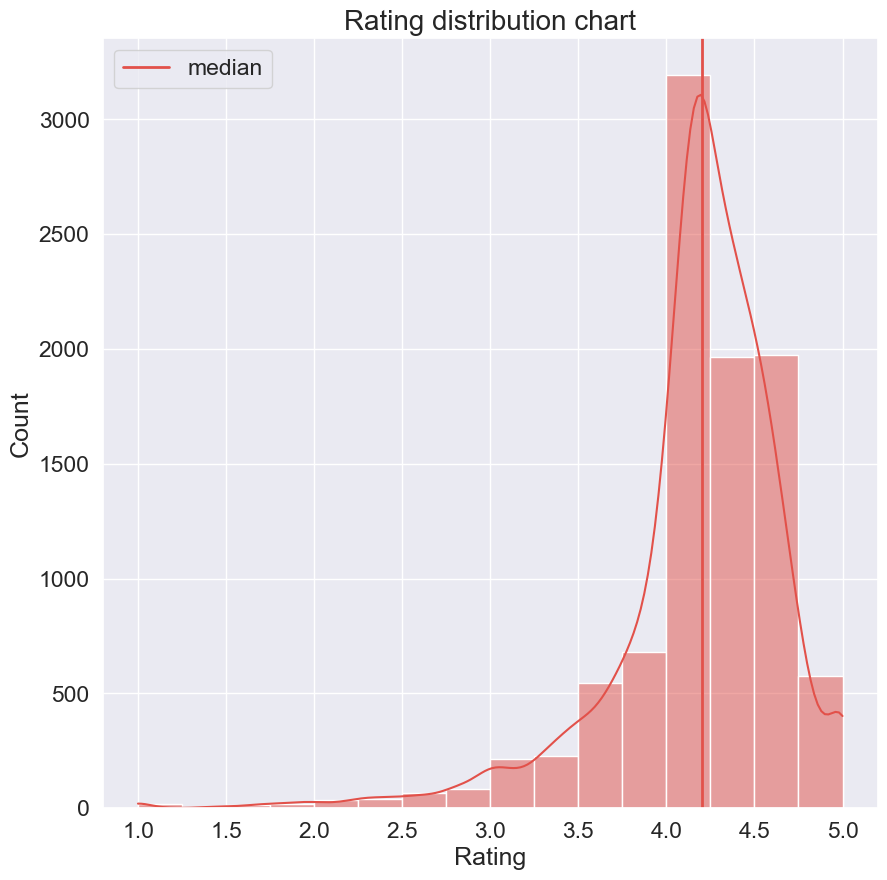

In [106]:
# Style
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

#Create
plt.figure(figsize = (10,10))
hist = sns.histplot(data=df, x="Rating", bins  = 16, kde = True)
plt.title("Rating distribution chart", fontsize = 20)

important_vals = df.Rating.quantile([0.5]).to_list()
labels = ["median"]

plt.axvline(important_vals[0], label = labels[0], linestyle='solid', linewidth=2)
plt.xticks()
plt.legend()
plt.show()


**OBSERVATION :**  
After drawing some charts, here are some conclusion I got: 
- The mean , median and mode are : 4.172172, 4.2 and 4.3. The fact that the mean is close to the median and mode suggests that the dataset may have a relatively normal or symmetric distribution( require further analysis). The fact that the mean, median, and mode are all clustered around the 4.2-4.3 range suggests that this is a central tendency of the dataset. It gives an idea of where the bulk of the values are concentrated.
- With the `Rating distribution chart` we found that there is a left skew distribution in `Rating` field. Rating values gradually increased an got peak at 4.0 - 4.25. Then drop strongly later.

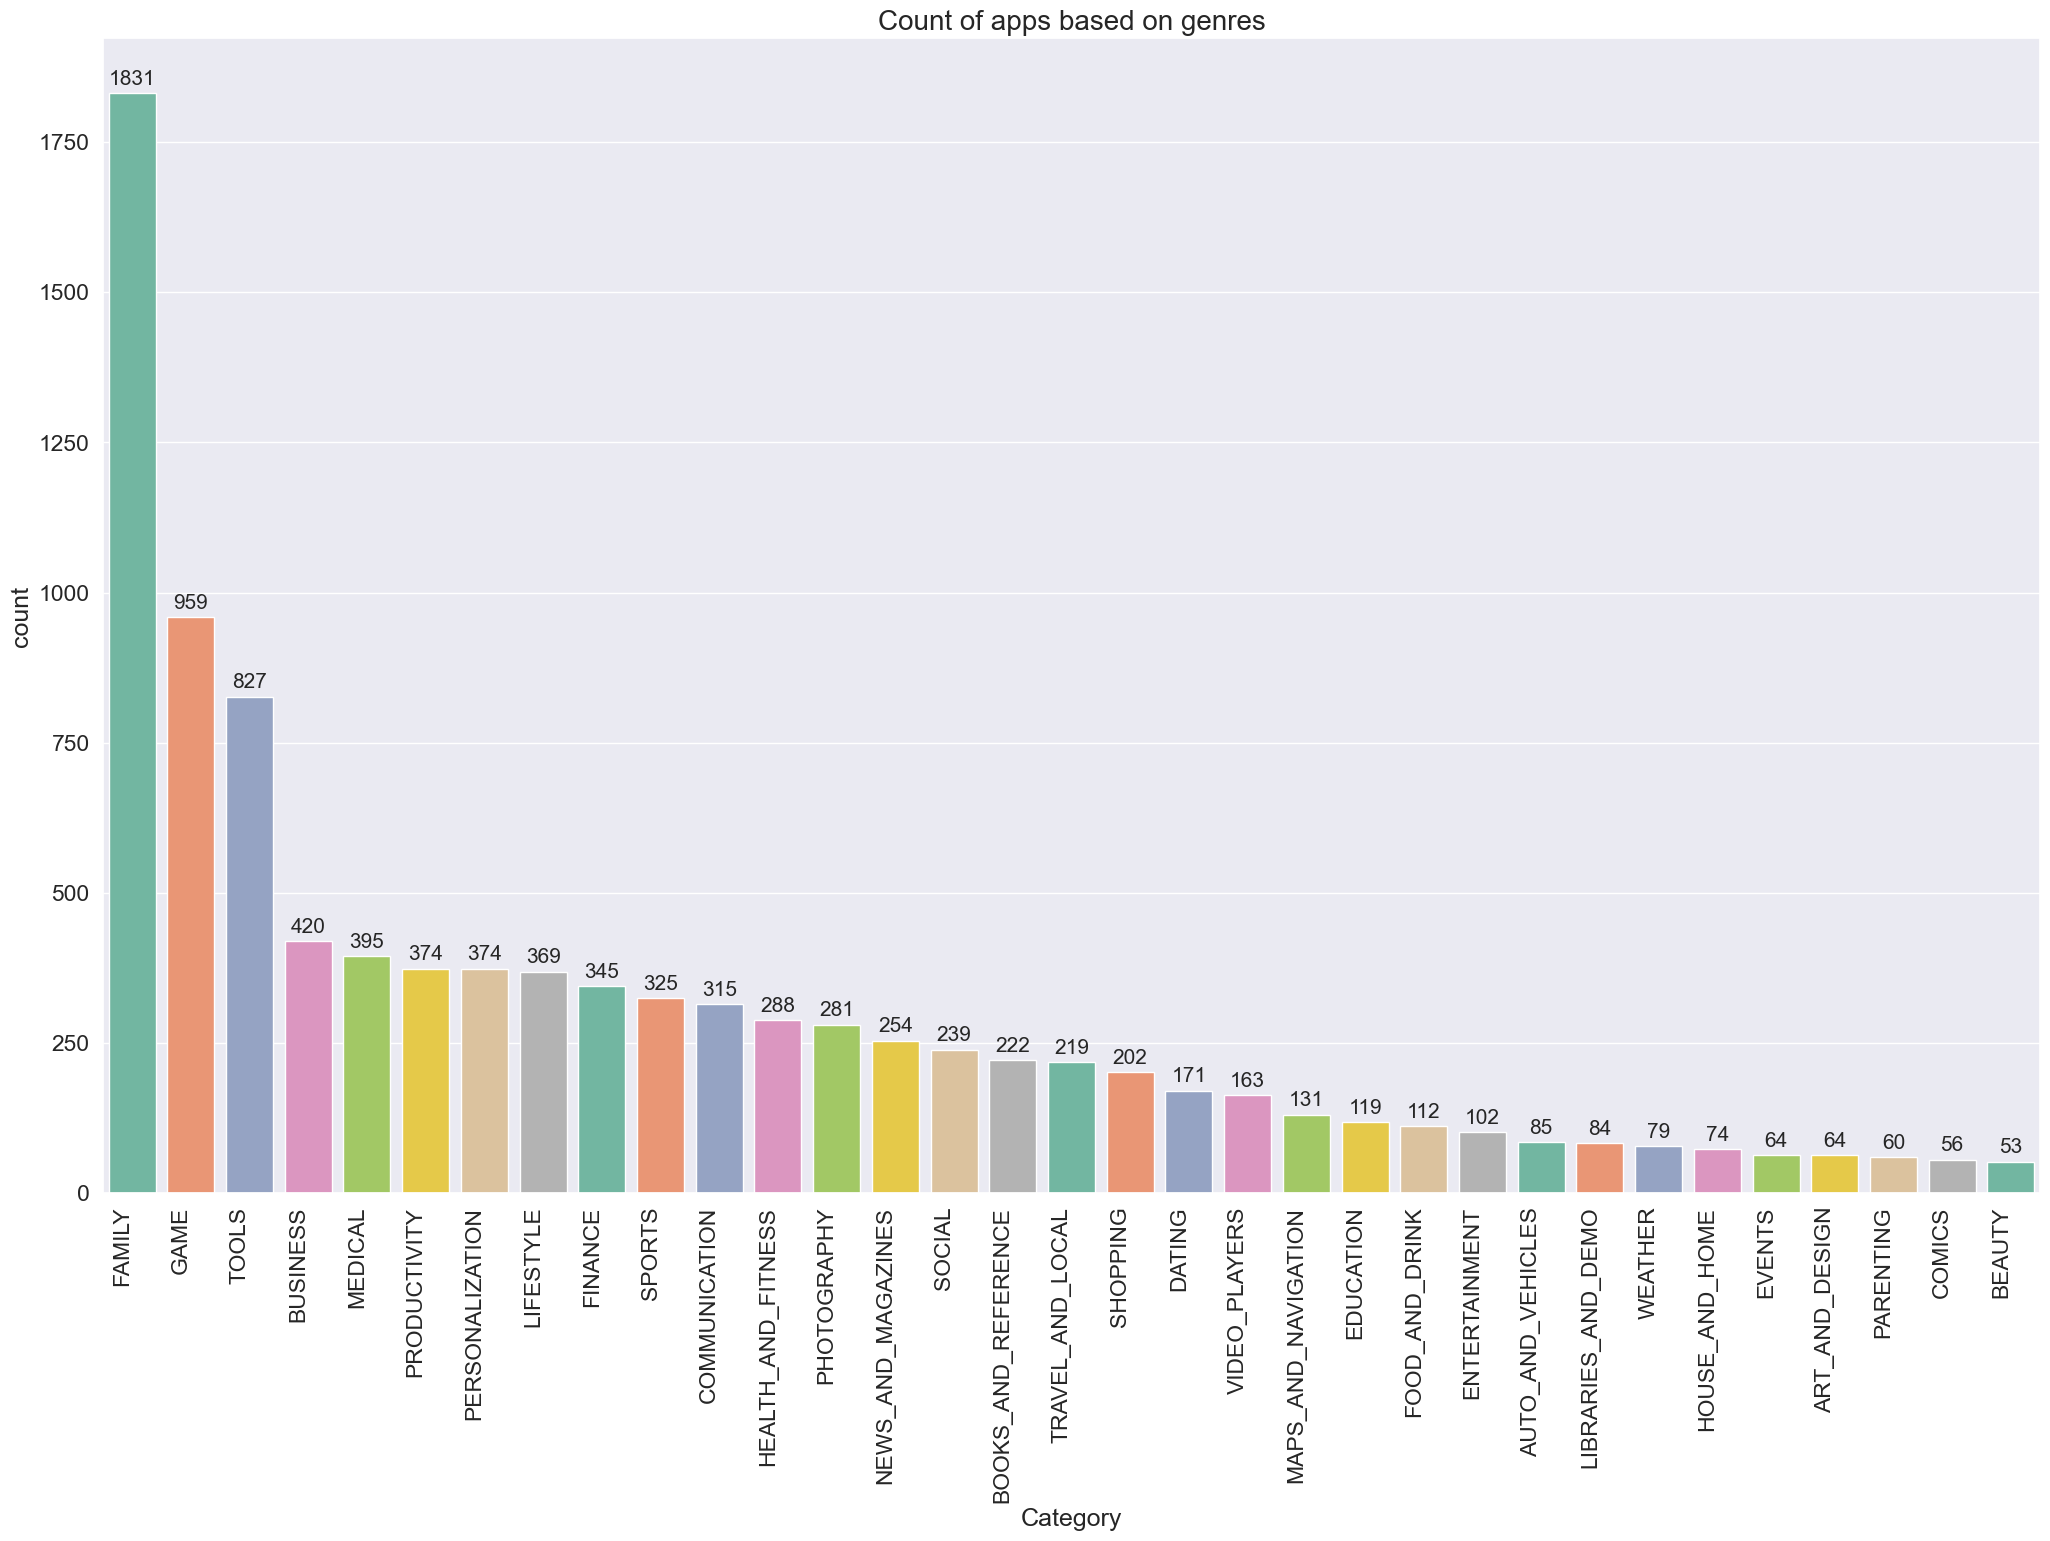

In [107]:
order = df['Category'].value_counts().index
ax = sns.countplot(x="Category", data=df, palette="Set2", order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Count of apps based on genres', size=20)

for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords= 'offset points', size = 15)

plt.show()


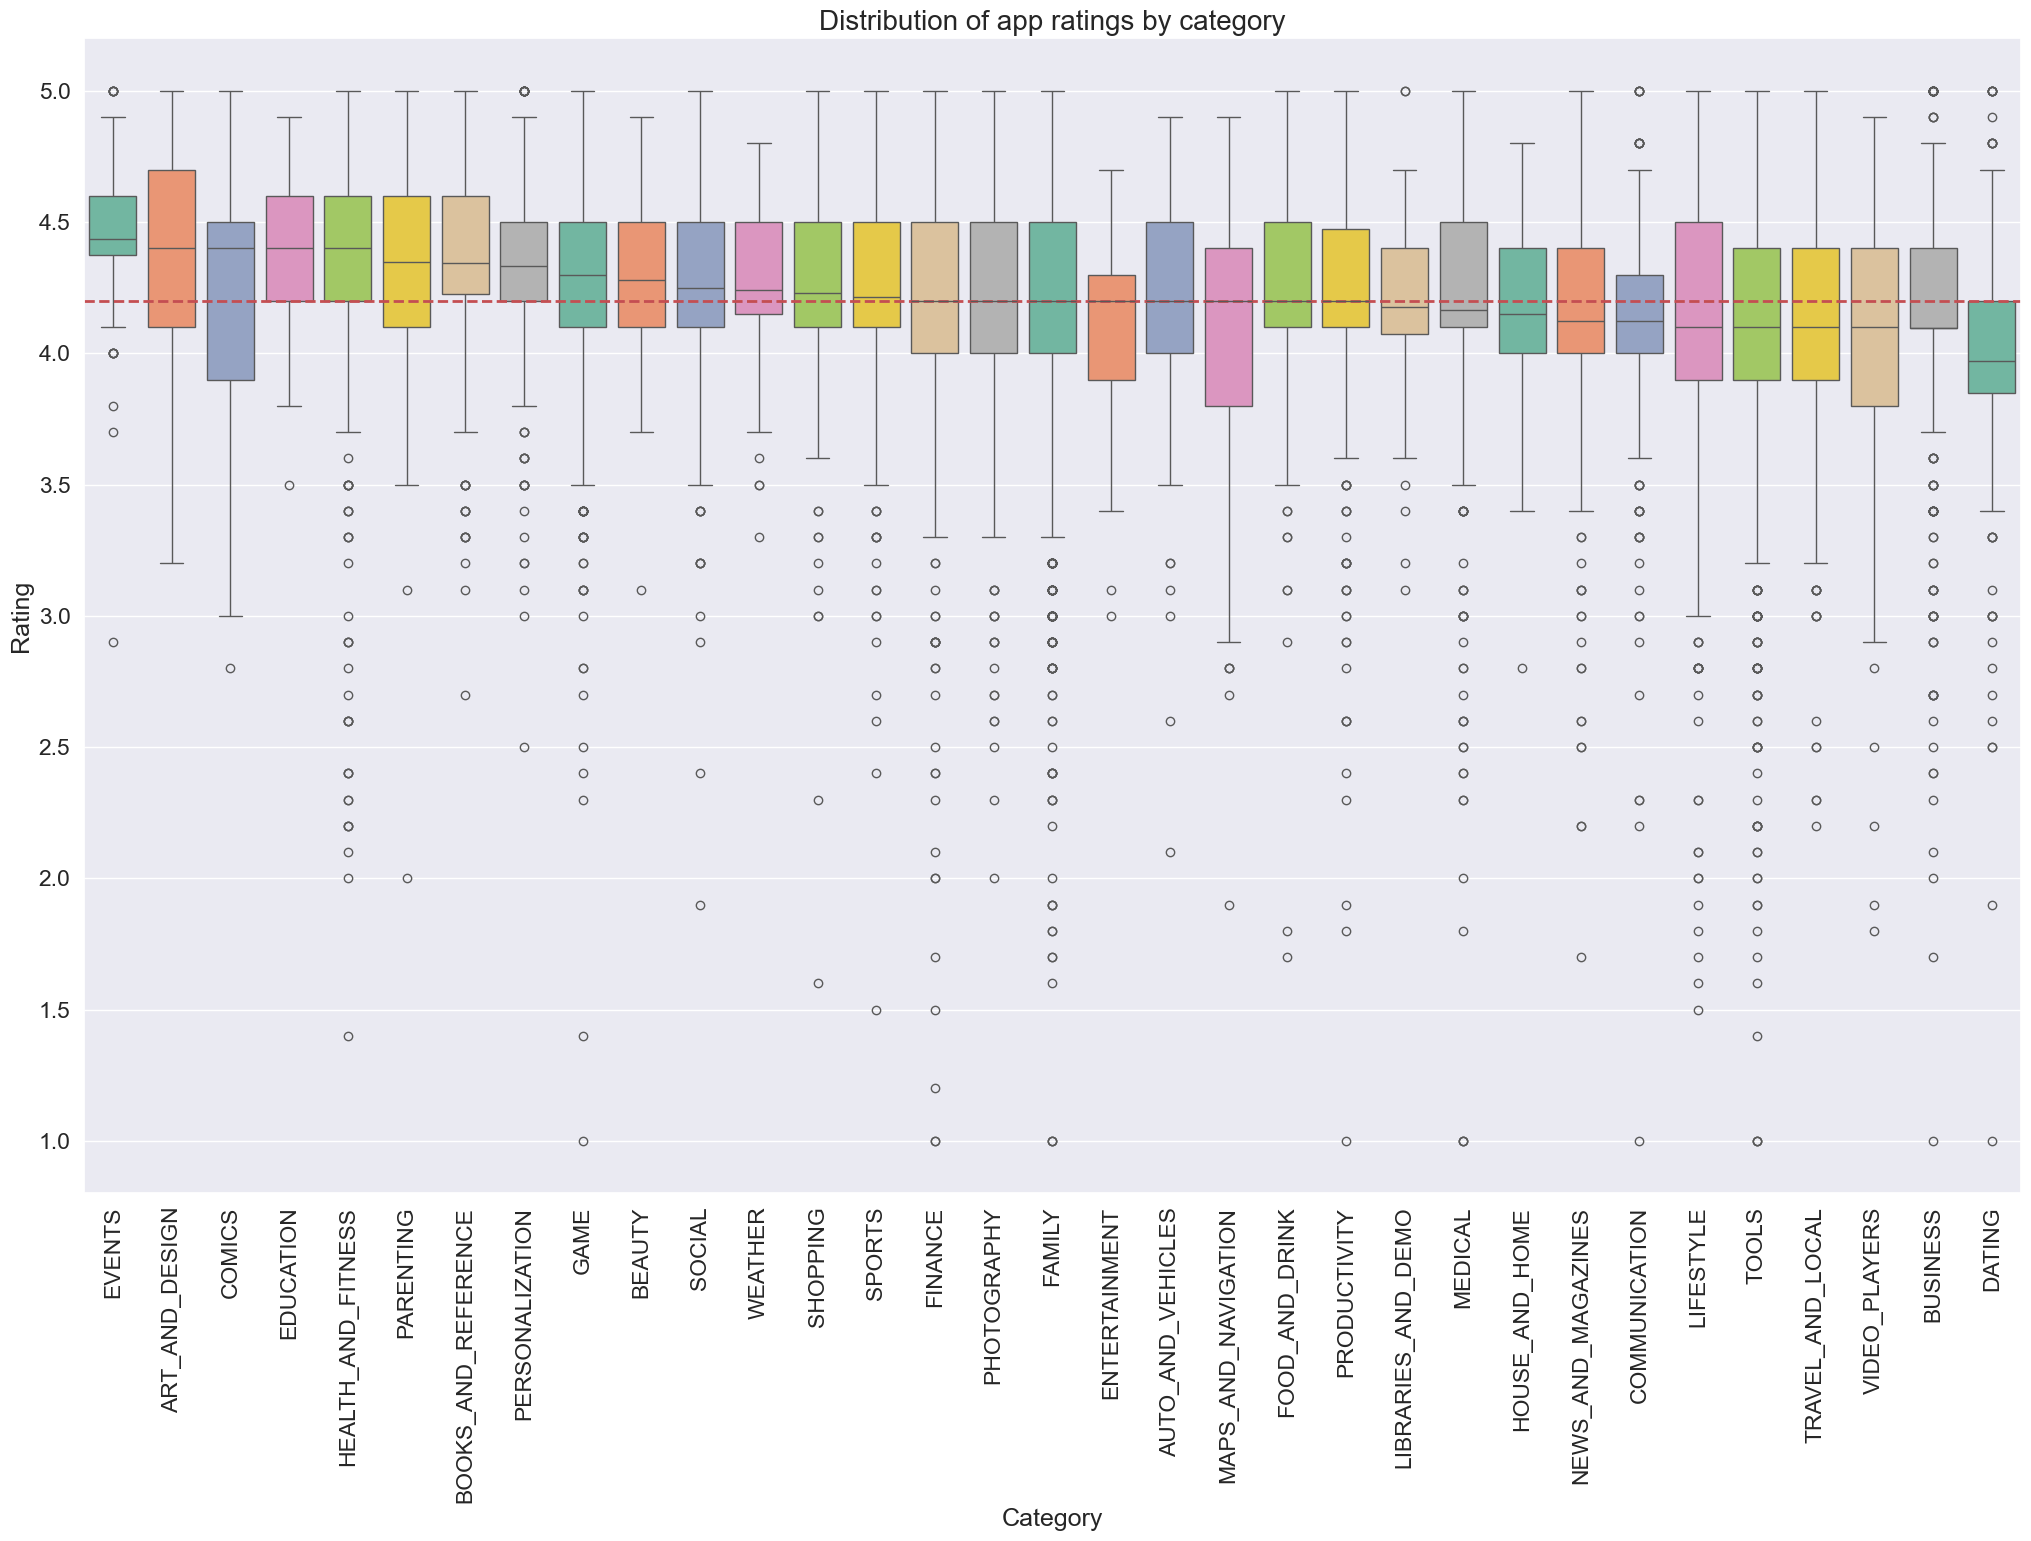

In [108]:
order = df.groupby('Category')['Rating'].median().sort_values(ascending=False).index
ax = sns.boxplot(y='Rating', x='Category', data=df, palette="Set2", order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Distribution of app ratings by category', size=20)

medians = df.groupby('Category')['Rating'].median().sort_values(ascending=False)
pos = range(len(medians))

plt.axhline(y= df.Rating.median(), color='r', linestyle='--',linewidth = 2)
plt.show();


**OBSERVATION :**  
- The `Count of apps based on genres` chart gives us some valuable information. **Famiy, Game and Tool** are the three categories which dominant the app market. On the other sight, **Event, Art and design, Parenting, Comics and Beauty** take quite percentage in the dataset. From these things, we can give our some hypothesis on people preference, attention and chance for application manufacture.
  1. People now have strong focus on application relating **Famiy, Game and Tool**. Creating an application in these fields could have higher probability to get puplic attention and success. However, the manufacturer will face fierce competition from competitors in the market.
  2. For **Event, Art and design, Parenting, Comics and Beauty** applications. Creating applications in these areas will likely receive little public attention. However, this can also create opportunities because there is less competition from competitors.
  3. The number of application can reflect high or low demand from peole. Low number of applications in an category don't mean people do not need them but It could mean the applications are good enough that they donot need more apps.  
- Finally, let's see what message 'Distribution of app ratings by category' chart convey us:
  1. Although **Event, Art and design, Parenting, Comics and Beauty** applications have little in amount but the median rating of these application get far high from the median of all the market.
  2. **Game** applications is the only one satisfy both the quantity and quality.
  3. **Family** applications is the safe choice.
  4. **Tools** have greate amount in quantity but many of them bring user poor experience.

#### STEP 2: Deeper analysis in High rate application

In [109]:
## Preprocessing 
df_rating_5 = df[df.Rating == 5.].copy()
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()
df_rating_5_content_rating =  df_rating_5['Content Rating'].value_counts().reset_index()
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 271 apps having rating of 5.0


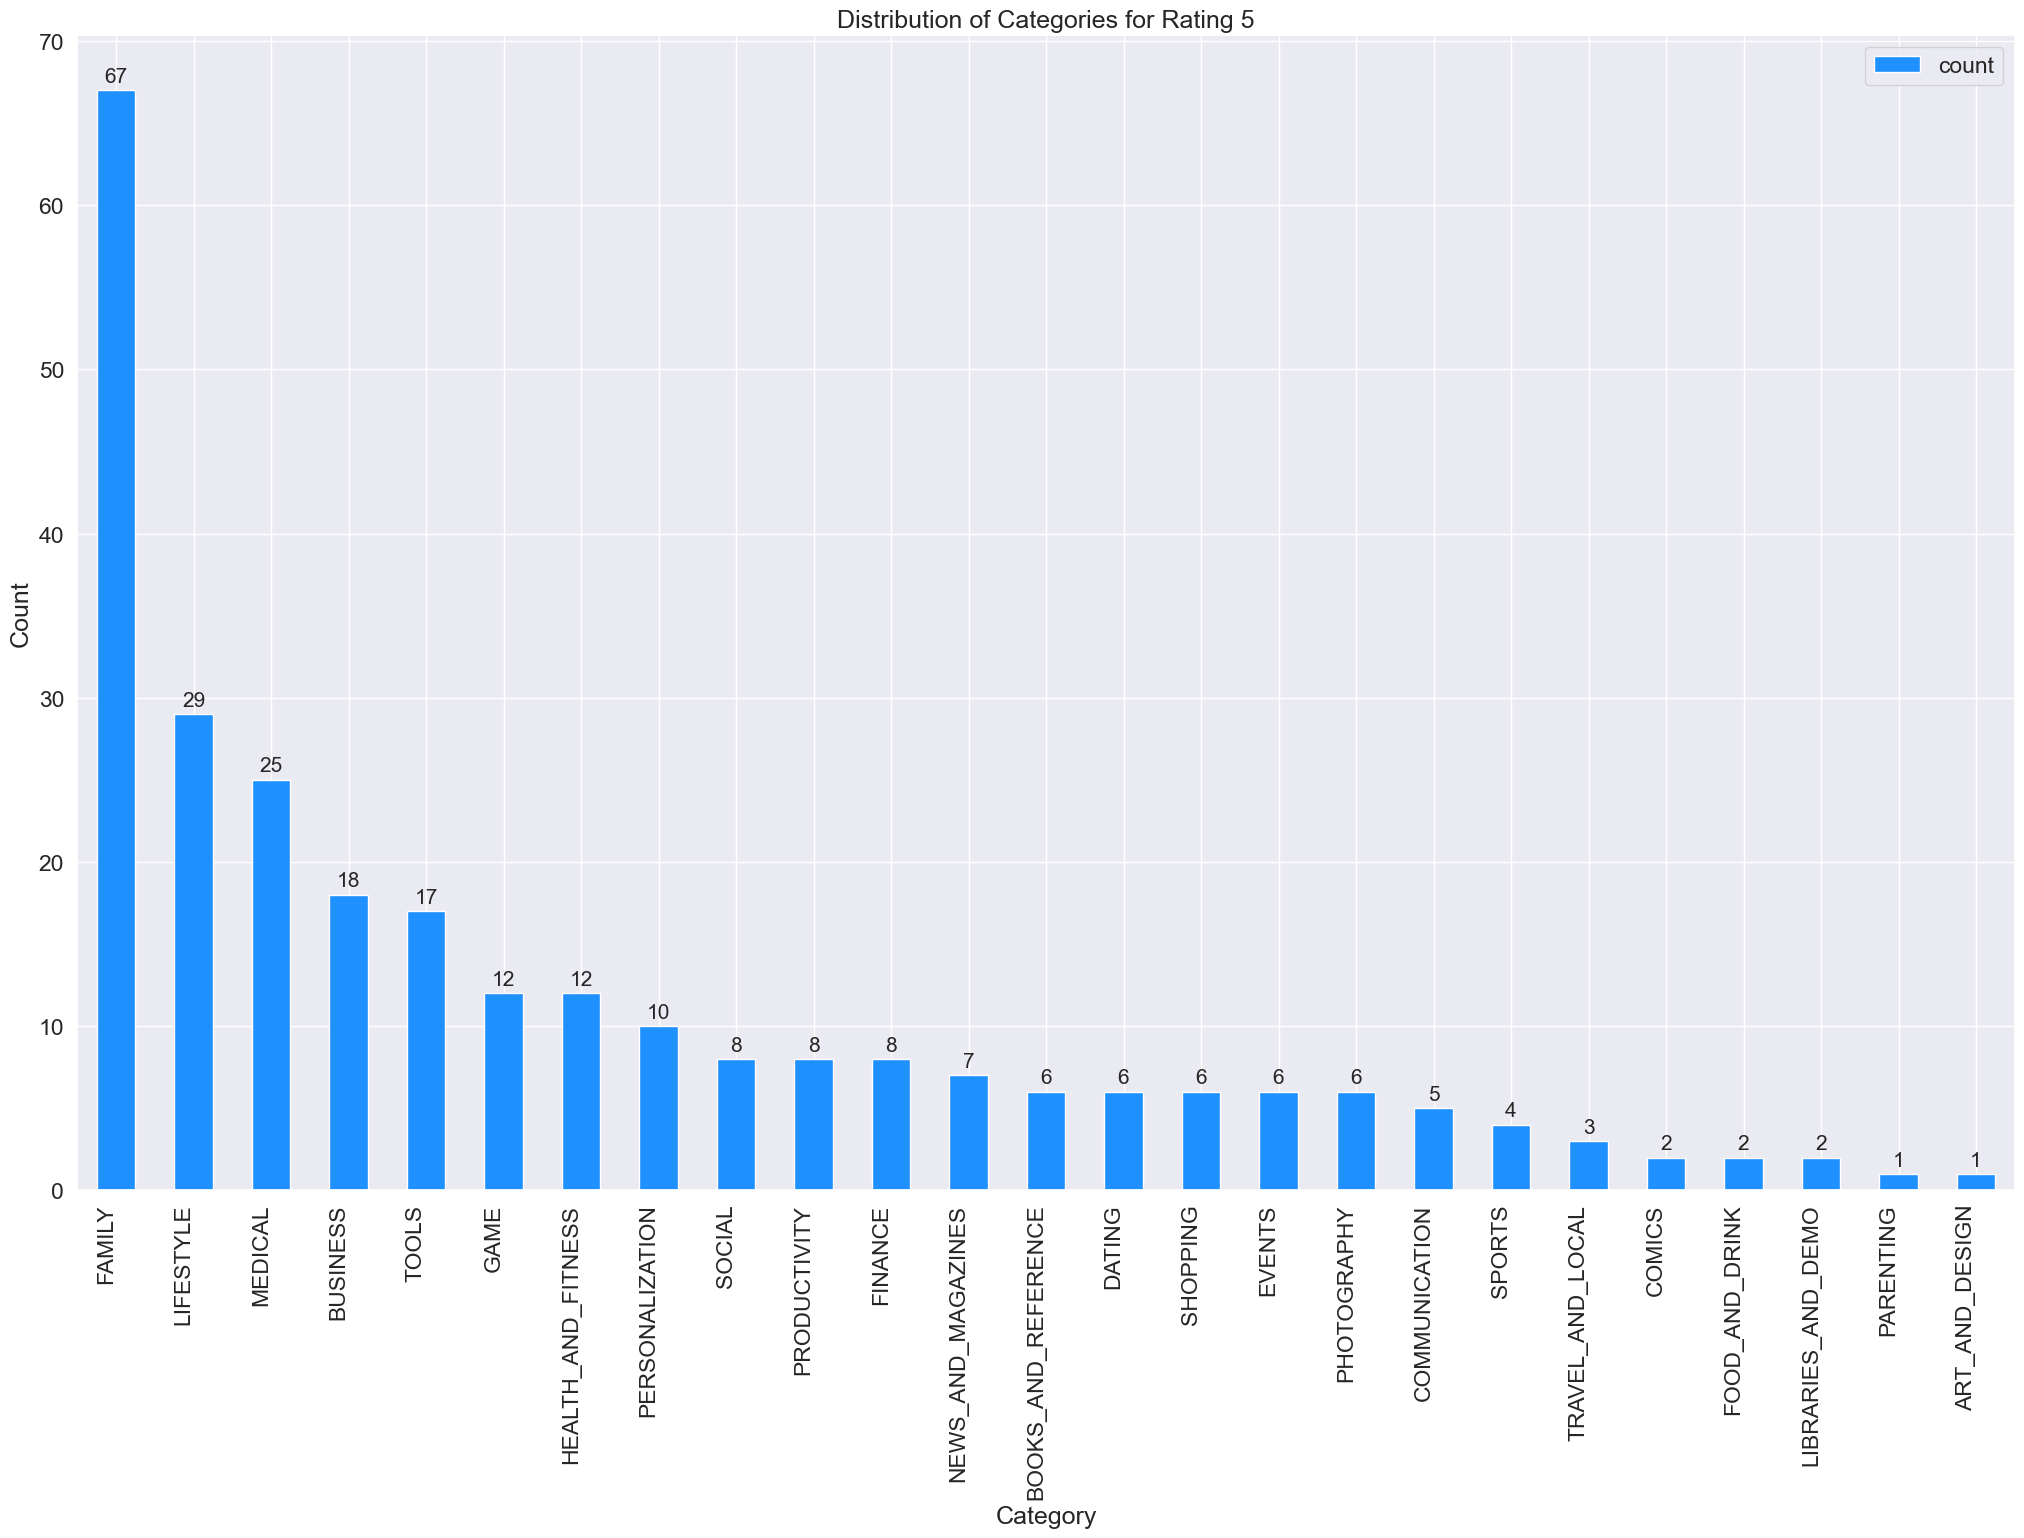

In [110]:
# create a bar chart
ax = df_rating_5_cat.plot(kind='bar', x='Category', y='count', rot= 90, color='dodgerblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords= 'offset points', size = 15)
# add title and axis labels
plt.title('Distribution of Categories for Rating 5')
plt.xlabel('Category')
plt.ylabel('Count')

# show the plot
plt.show()

**OBSERVATION :**
- There still some familiar categories such as: **Family, Tools, Games, ..** which we have met in general analysis.
- However, we also see that some categories have strong revival, namely: **Lifestyle, Medical, Business, Health and  fitness,..**.

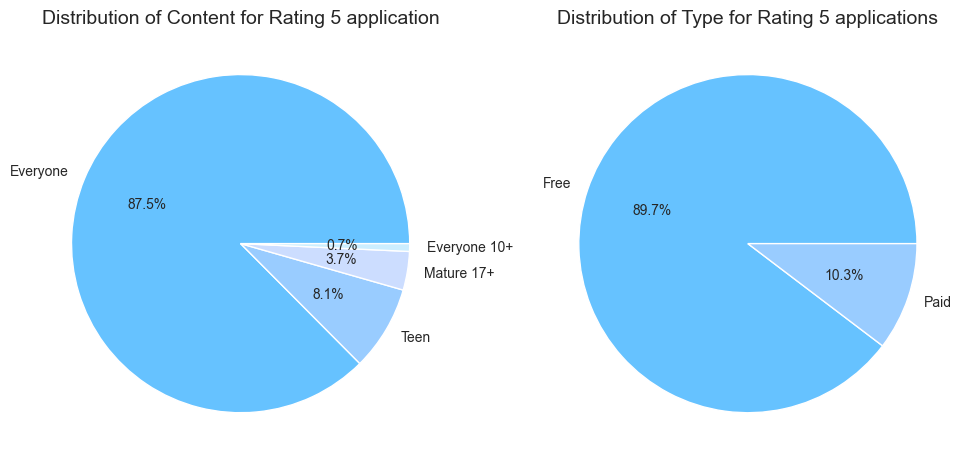

In [111]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
cool_colors = ['#66c2ff', '#99ccff', '#ccddff', '#cceeff', '#99e6e6']
# create the first pie chart
ax1.pie(df_rating_5_content_rating['count'], labels=df_rating_5_content_rating['Content Rating'], autopct='%1.1f%%', textprops={'fontsize': 10}, colors=cool_colors)
ax1.set_title('Distribution of Content for Rating 5 application',size = 14)

# create the second pie chart
ax2.pie(df_rating_5_type['count'], labels=df_rating_5_type['Type'], autopct='%1.1f%%', textprops={'fontsize': 10}, colors=cool_colors)
ax2.set_title('Distribution of Type for Rating 5 applications',size = 14)

# show the plot
plt.show()

**OBSERVATION :**  
- Most of the High rating apps focus on the public. This is reasonable because the vast subject the app aim to also means that it is likely to contain some features such as: ease to use, simplicity, friendliness,... which are some importance citeria for an interesting app.
- An unsubprise information else is: People are appealing to free apps. Paid apps only account for 10.3% which tells that these app must have something extremely special enough that someone willing to pay for it. 

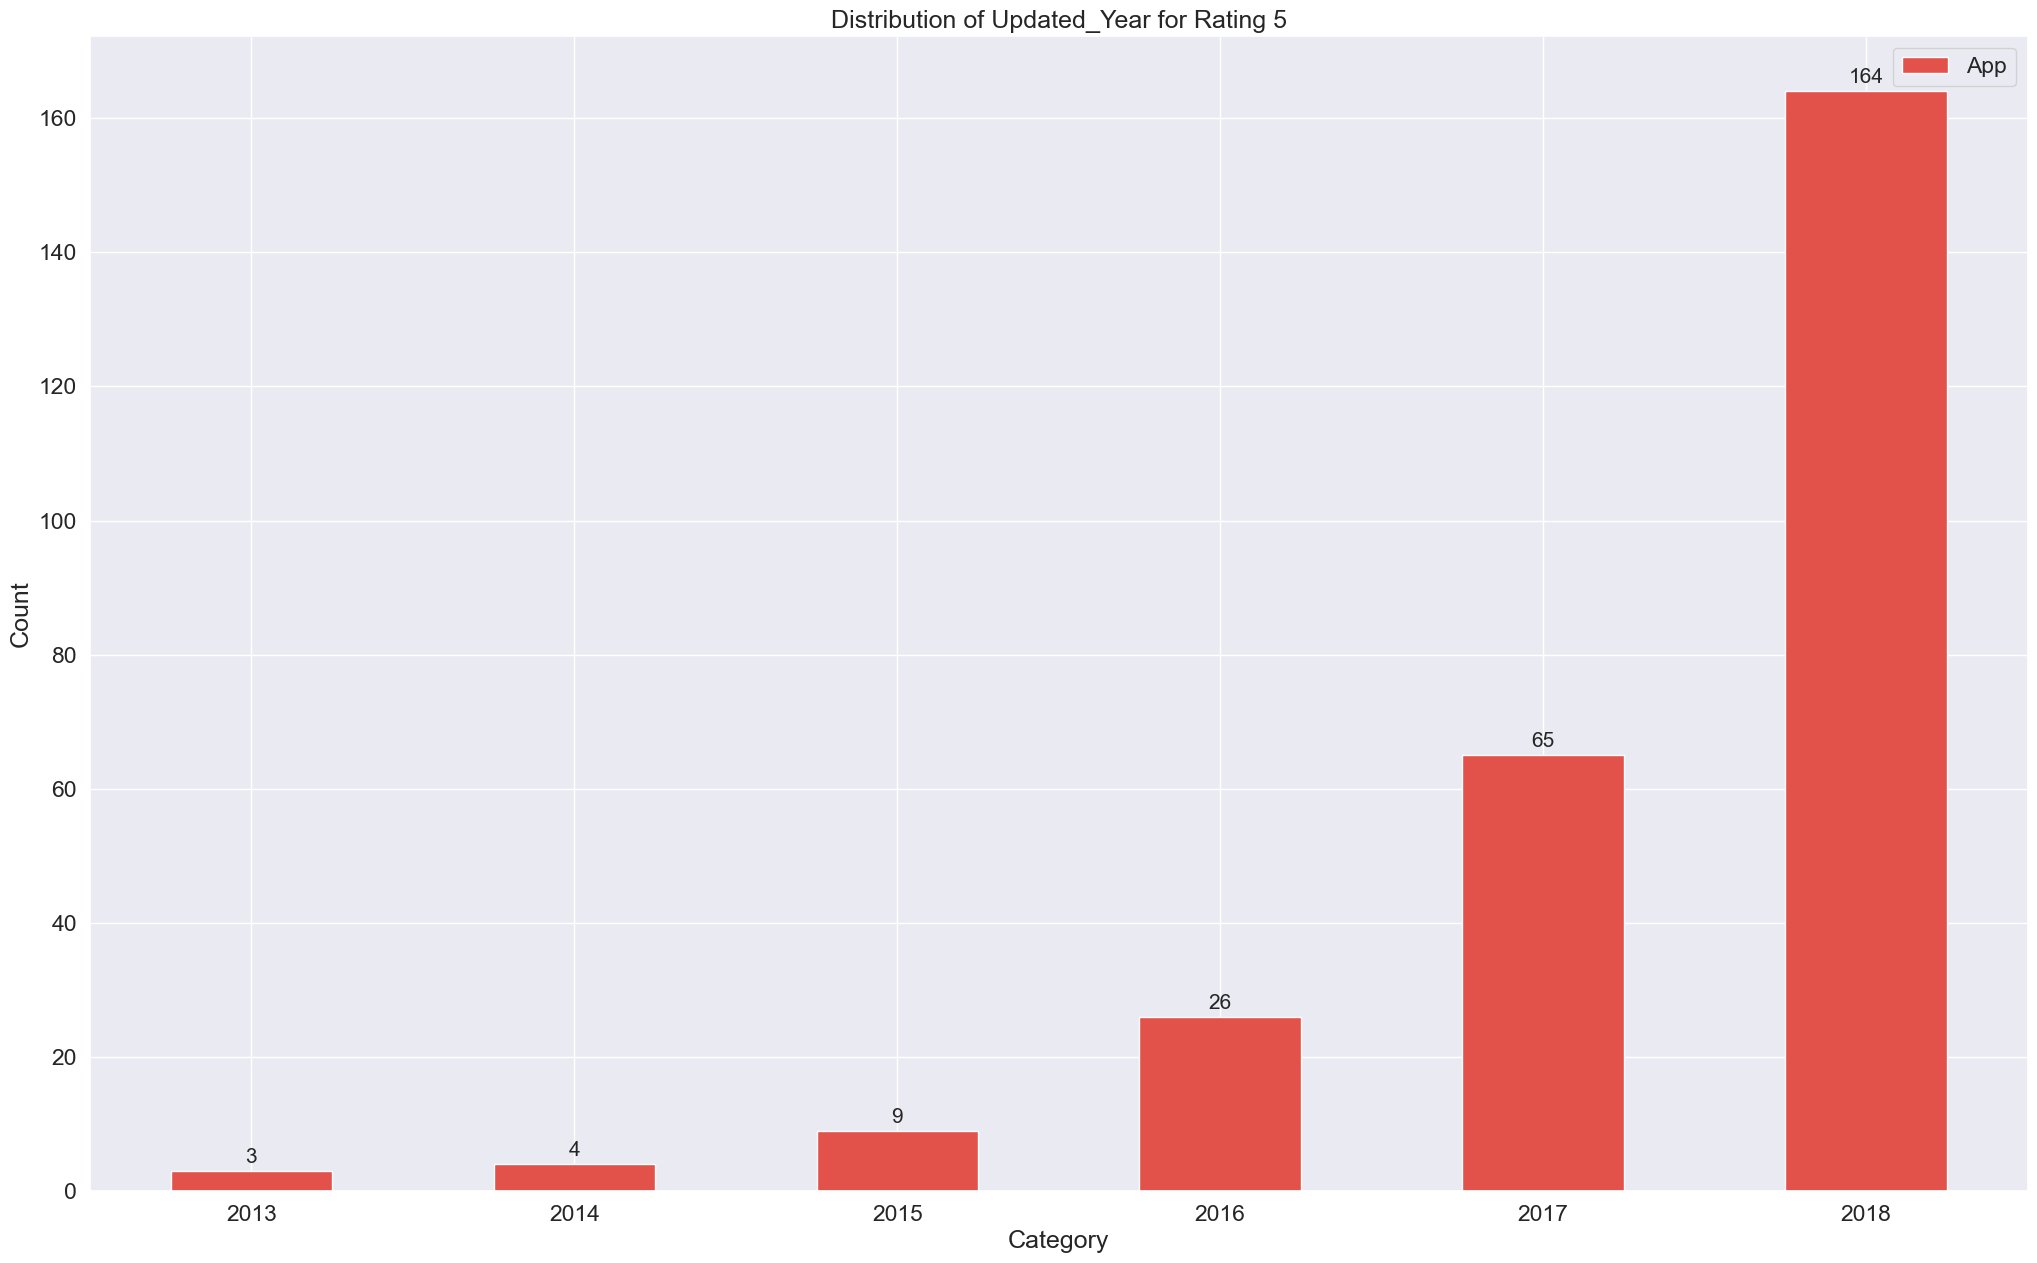

In [112]:
year = df_rating_5.groupby(["Updated_Year"]).count()
year = year.reset_index()
year = year.iloc[:,:2]
# create a bar chart
ax = year.plot(kind='bar', x='Updated_Year', y='App', rot= 0)
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords= 'offset points', size = 15)
# add title and axis labels
plt.title('Distribution of Updated_Year for Rating 5')
plt.xlabel('Category')
plt.ylabel('Count')

# show the plot
plt.show()

**OBSERVATION :**  
We can see some apps with `last update` years ago but they are not the typical situations. People prefer to using application which are still updated by the manufacturer. 


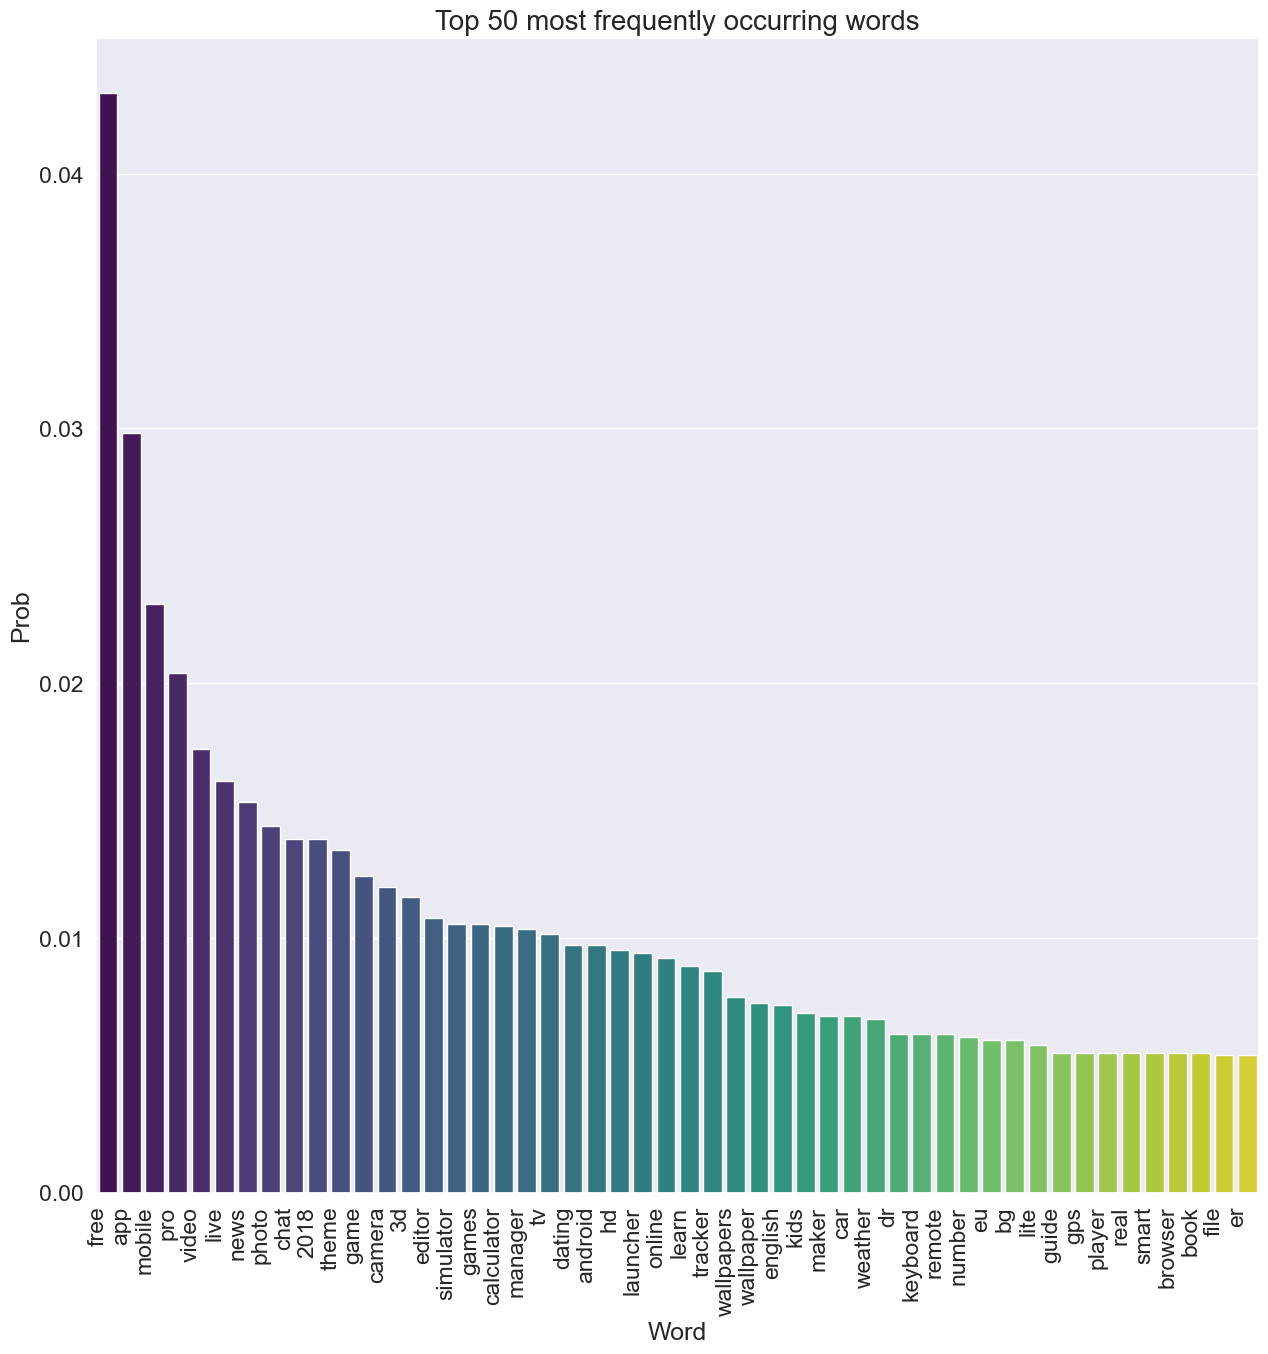

In [113]:
corpus = list(df['App'])
vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(corpus)
names = vectorizer.get_feature_names_out()
values = X.toarray().mean(axis=0)
# Dataframe
word = pd.DataFrame([names,values])
word = word.T
word.columns = ['Word',"Prob"]
word = word.sort_values('Prob', ascending=False)
#Visualize
plt.figure(figsize=(15, 15))
sns.barplot(x= word.Word, y= word.Prob, palette="viridis")
plt.title('Top 50 most frequently occurring words', size=20)
plt.xticks(rotation=90, ha="right")
plt.show()

**OBSERVATION**
The name which the manufacture give to an app also somehow affect its whole life. In general, App with high rate often go with positve word such as: dating, learn,... or word express purpose of app such as mobile, video, live,... The word 'free' once again contribute to the success of an app.

#### STEP 3: SUMARIZE AND GIVE OUT CONCLUSION

- The analysis of the Google Play Store dataset has shown that there is a weak correlation between the rating and other app attributes such as size, installs, reviews, and price. We found that there was a moderate positive correlation between the number of installs and the rating, suggesting that higher-rated apps tend to have more installs.

- The categories of the application  is an important that publisher must take into consideration:
  1. Although **Event, Art and design, Parenting, Comics and Beauty** applications have little in amount but the median rating of these application get far high from the median of all the market.
  2. **Game** applications is the only one satisfy both the quantity and quality.
  3. **Family** applications is the safe choice.
  4. **Tools** have greate amount in quantity but many of them bring user poor experience.
  5. **Lifestyle, Medical, Business, Health and  fitness** have moderate in quantity. However, people have a tendency to spend greater love for them.

- The applicaition aim to everyone occupy large percentage in high rating app.
- Free applications have higher probality to climb chart.
- User love up-to-date application.
- Name of an application will affect its life in some extent.
 aid apps.

**YOUR ANSWER** :

### **Question 02**: Vo Phu Han

**Why we need to answer this question?**

**How to answer this question?**

In [114]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

In [115]:
# YOUR CODE HERE
# Exclude the categorical features from the matrix

In [116]:
# VISUALIZE YOUR ANSWER(OPTION)

**YOUR ANSWER**